### Loan Data Analysis - BIDA406 Assignment 2 - Roma Rico Flores

#### Statement of the Problem

Lending money to customers is inherently risky, as there is always a chance that the borrower may default on the loan. Money lending institutions need to manage credit risk effectively to minimize the likelihood of loan defaults and mitigate the potential losses.

The goal of this model is to predict whether a loan applicant is likely to be approved or denied a loan based on certain factors listed in the dataset such as their credit history, age, income, education level, and loan amount. This model is not intended for real-world application because of the simplicity of the dataset and biases that features such as age, gender, and education.

With a better dataset, this model would help assist banks and other lending institutions in making informed decisions and reducing the risk of default by identifying high-risk loan applicants.

#### Sources

Data: <br />
https://www.kaggle.com/datasets/zhijinzhai/loandata <br />

Project Guides:
1. https://www.kaggle.com/code/varunmarvah/loan-dataset-analysis-basics by Varun Marvah
2. https://www.kaggle.com/code/gcdatkin/loan-payment-prediction-100-accuracy by Gabriel Atkin

#### Python Libraries
1. Numpy
2. Pandas
3. Seaborn
4. Sklearn
5. XGBoost


#### Contents
1. Exploratory Data Analysis
2. Data Modeling

### Exploratory Data Analysis and Data Visualization

In [63]:
#Import basic exploratory data analysis/visualization tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

#Import sklearn preprocessing tools for data modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Import sklearn machine learning algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

**Comments:** <br/>
Numpy is Python's library for mathematical and scientific computing, and working with arrays. Pandas is Python's library for data exploration and manipulation. Matplotlib is Python's basic tool for data visualization while Seaborn is another data visualization library that is built on top of matplotlib. Sklearn is a library for preprocessing, data modeling and machine learning.

In [64]:
#Loading our CSV data and converting it into pandas dataframe under the name df_loan 
df_loan = pd.read_csv("loan-payments-data.csv")

#Pulling out the first 5 records of the dataset using pandas head function
df_loan.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [65]:
#Checking the row by column size of our dataset using the pandas shape function
df_loan.shape

(500, 11)

**Comments** <br/>
From these first cells we already see that there are some NaNs in the past_due_days column. We can also see that we have a relatively small size of dataset, i.e. 500 rows by 11 columns.

In [66]:
#Checking the overview of the data's descriptive statistics for the columns with non-date numerical data
df_loan.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


**Principal**
- From these we can see that at least 75% of the observations have principal value or loan amount of 1000.
- It also has a mean of 943 which further confirms that most of our data indeed has a principal around 1000.
- It has a Standard Deviation of 115 which means around 68% of our data resides at +/- 115 units from the mean.

In [67]:
#Checking the summary of data to see if there are any nulls or NaNs
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


**Comment** <br/>
We see that most of the columns are complete but we could see that there should be at least **100 nulls for the paid_off_time column** and **300 nulls for the past_due_days** column. We will confirm it further with the "isnull" function.

In [68]:
df_loan.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

**Comments** <br/>
We confirmed that we have **100 null (NAN) values in paid_off_time** and **300 null values in past_due_days** which is fine which means if someone pays earlier before due date these columns will reasonably not contain any value.

We will decide later on Data Preprocessing what we will do with these NaN values, but for now we will continue exploring and understanding our data.

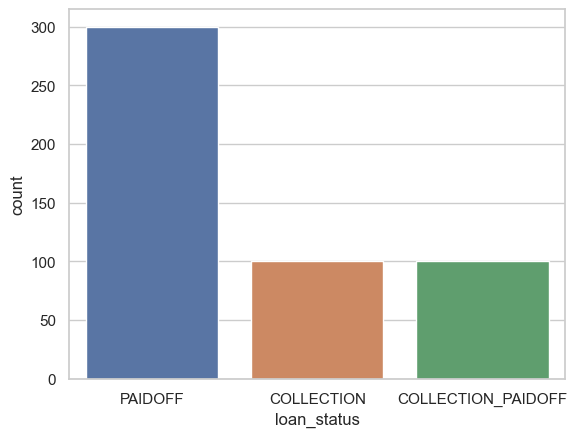

In [69]:
#Setting seaborn background to be just white
sns.set(style="whitegrid")

#Checking the number of observations per loan status: Paid Off, Collection or Collection_PaidOff status
x = sns.countplot(x="loan_status", data=df_loan)

**Comments:** <br/>
From this we can see that most of the loans have been **paid off without any collection efforts (blue)**, while there are equal number of loans which are **still being collected (orange)** and loans which have been **paid off after collection efforts (green)** 

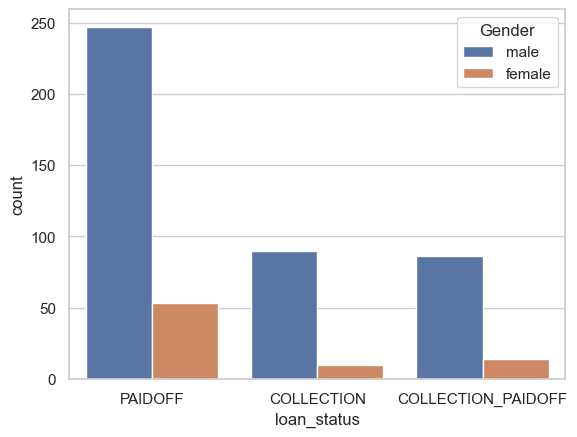

In [70]:
#Checking loan status based on gender, i.e. double bar chart wherein the color indicates gender
y = sns.countplot(x="loan_status", data=df_loan , hue='Gender')

**Comments:** <br/>
Chart shows that there are fewer number of observations for female borrowers in the sample compared to male.

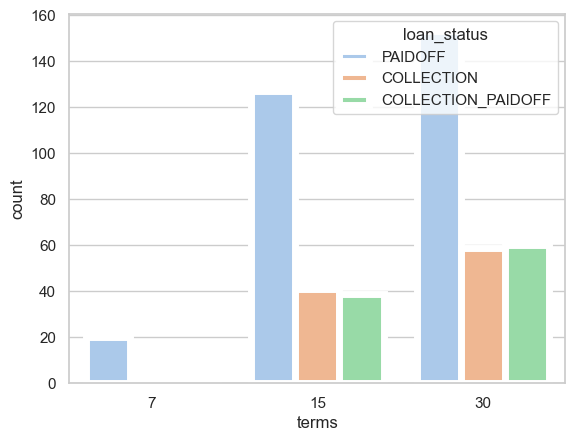

In [71]:
#Checking the loan totals for each schedule: Weekly (7 days), Bi-weekly (15 Days) , Monthly (30days) payments and their loan status.
x = sns.countplot(x="terms", data=df_loan , hue='loan_status', palette='pastel', linewidth=5)

**Comments:** <br/>
There are few borrowers who have set their schedule to pay weekly but all of them have already been paid off. While there are also some who have their schedule set to biweekly and monthly modes. Analyzing visually, borrowers who aren't paid yet seems to have set their schedule to monthly, but it was not greatly different to the borrowers who have set their schedules to bi-weekly. 

In [72]:
df_loan[df_loan.loan_status.notnull()]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


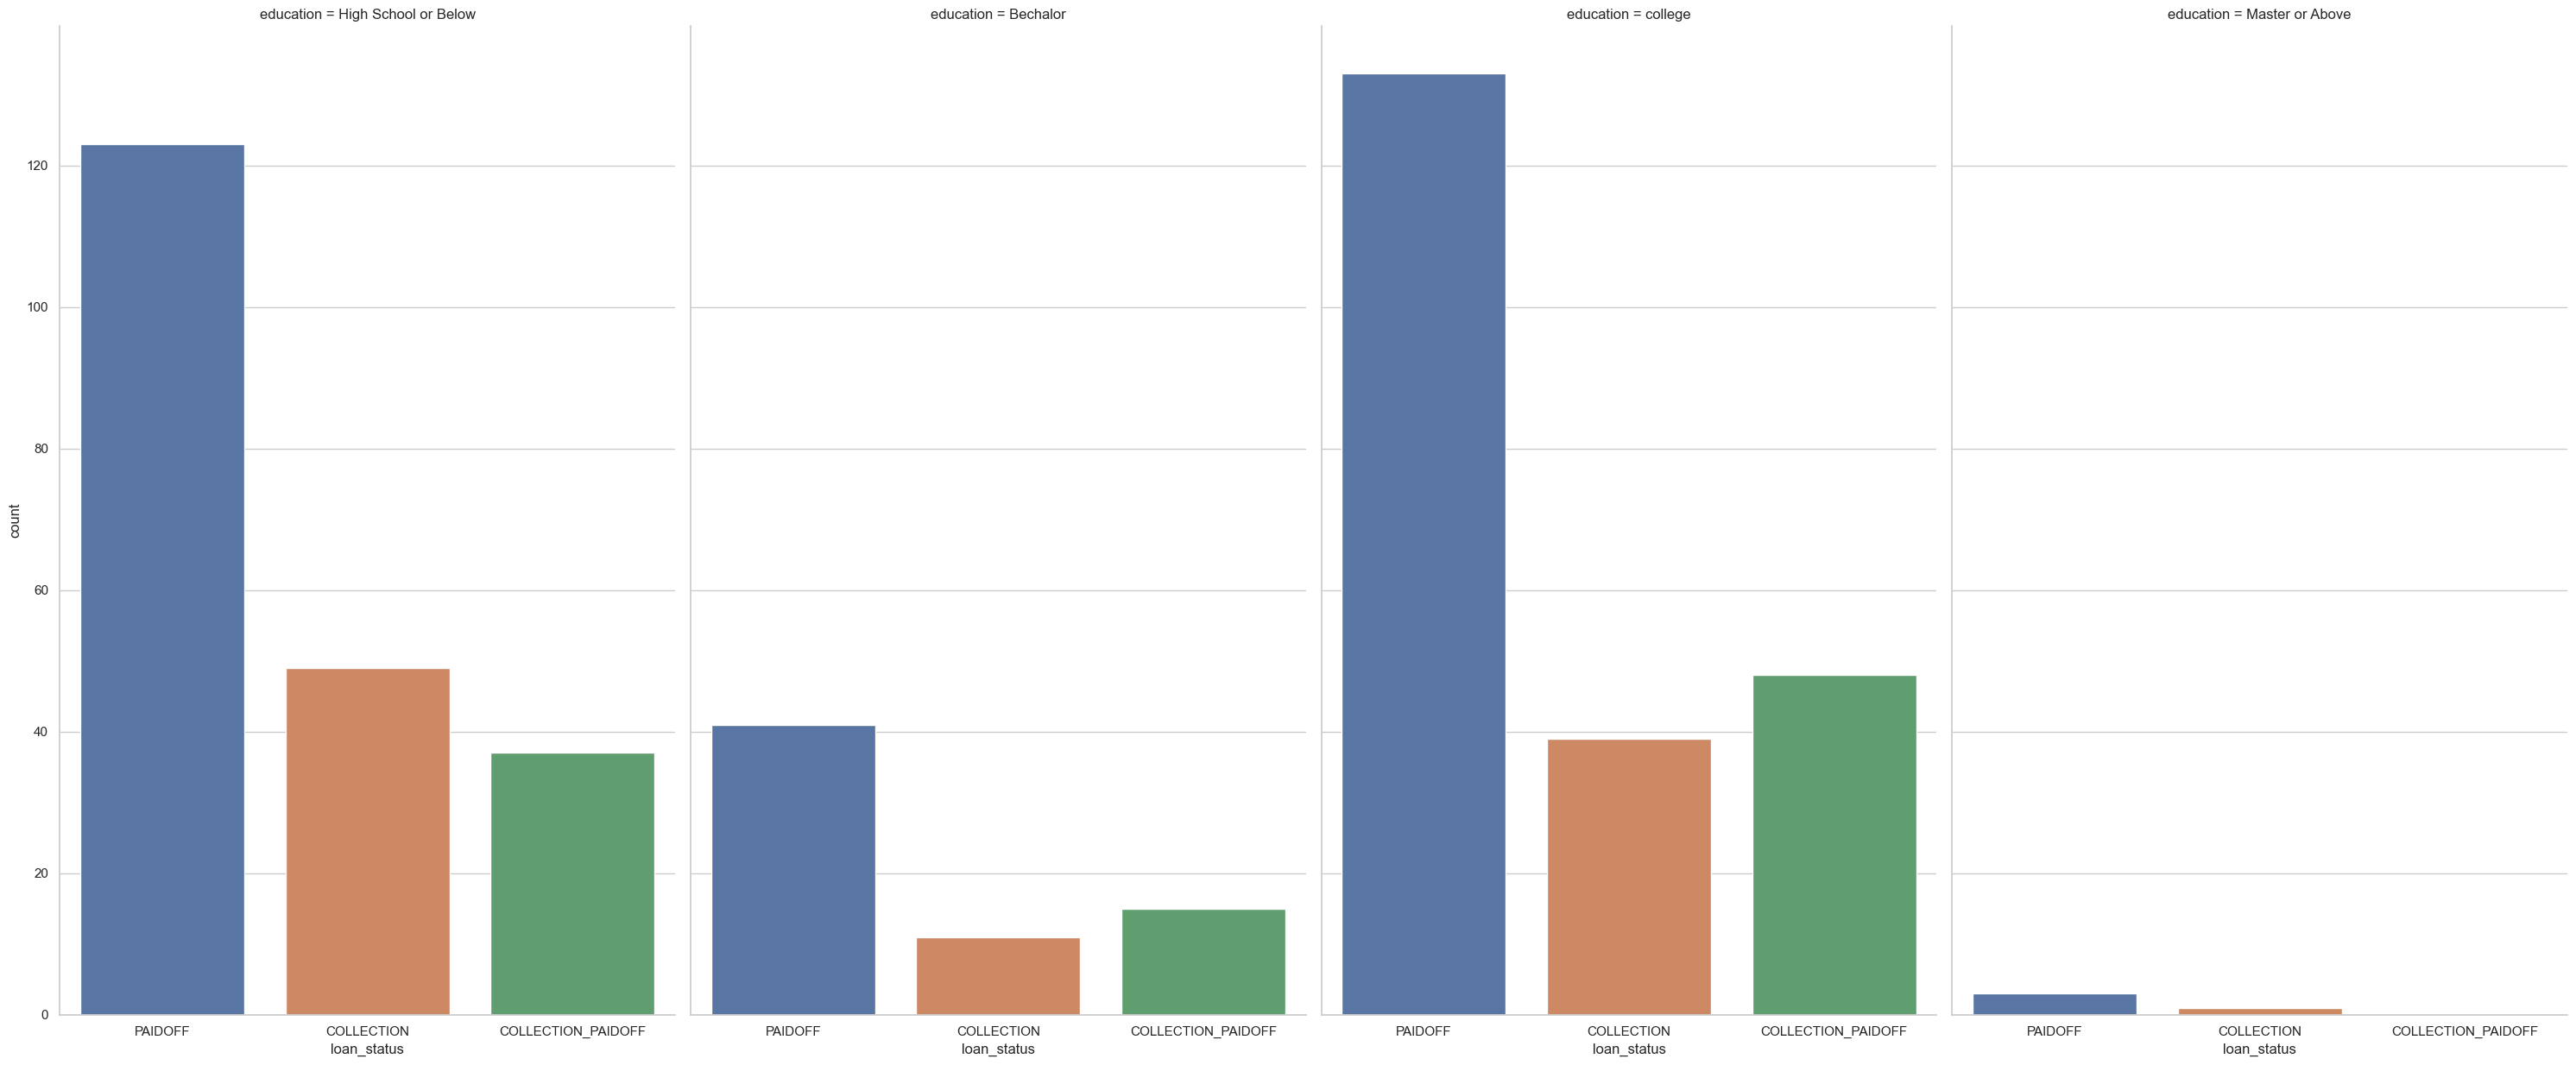

In [73]:
#Checking if level of education affects loan amount and payment status.

educ = sns.catplot(data=df_loan[df_loan.loan_status.notnull()],
                   x="loan_status", col="education", col_wrap=4,
                 kind="count", height=12.5, aspect=.6)

**Comments:** <br/>
In the above visualization we have each level of education per column cell. And each cell is classified further into the loan status of the borrower. From the data, High School and College grads paid back well in time so they are *better candidates for loans by banks.

There are fewer applications for Bachelors degree students and most of them paid it off by themselves (i.e. without collection efforts from the institution) while some paid off after collection efforts (green).

Lastly, there are very few Post-grad degree holder borrowers from the dataset and mostly have paid it without intervention while there is very which are still not paid off.

*Based on the dataset

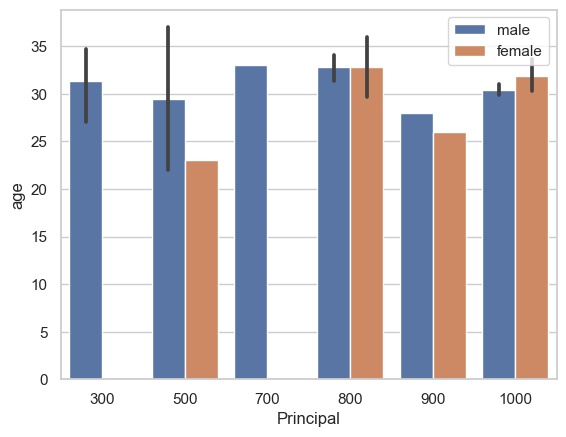

In [74]:
#Checking if there is relationship between the amount of loan (Principal) and the gender and age of the borrower

ax = sns.barplot(x="Principal", y="age",hue="Gender" ,  data=df_loan)
ax.legend(loc="upper right")

**Comment:** <br/>
The visualization shows that for principal amount borrowed by male and female borrowers

**Note:** <br/>

Black bar indicates the the error bar. This represents the variability of data and used on graphs to indicate the error or uncertainty in a reported measurement, i.e. error tolerance.

<Figure size 2500x500 with 0 Axes>

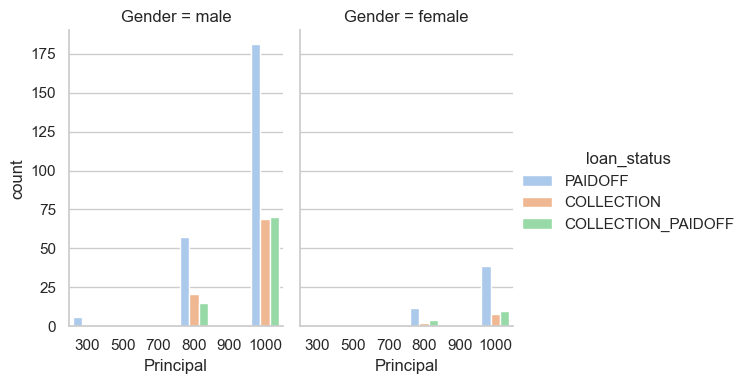

In [75]:
#Checking if there is relationship between the loan status and gender

fig = plt.figure(figsize=(25,5))
g = sns.catplot(x="Principal", hue="loan_status", col="Gender",palette='pastel',
                data=df_loan, kind="count",
                 height=4, aspect=.7);

**Comment:** <br/>
From the visualization we can clearly see that there is much more male borrowers compared to female borrowers.

**Pairplot:** <br/>

Now we'll do a pairplot with the color distinguishing the gender, what it does is similar to a correlation table.

Pairplot looks busy at first glance as there are a lot of things going on, but it is useful when we are trying to understand the best set of features to explain a relationship between two variables or to form the most separated clusters (for our training later).

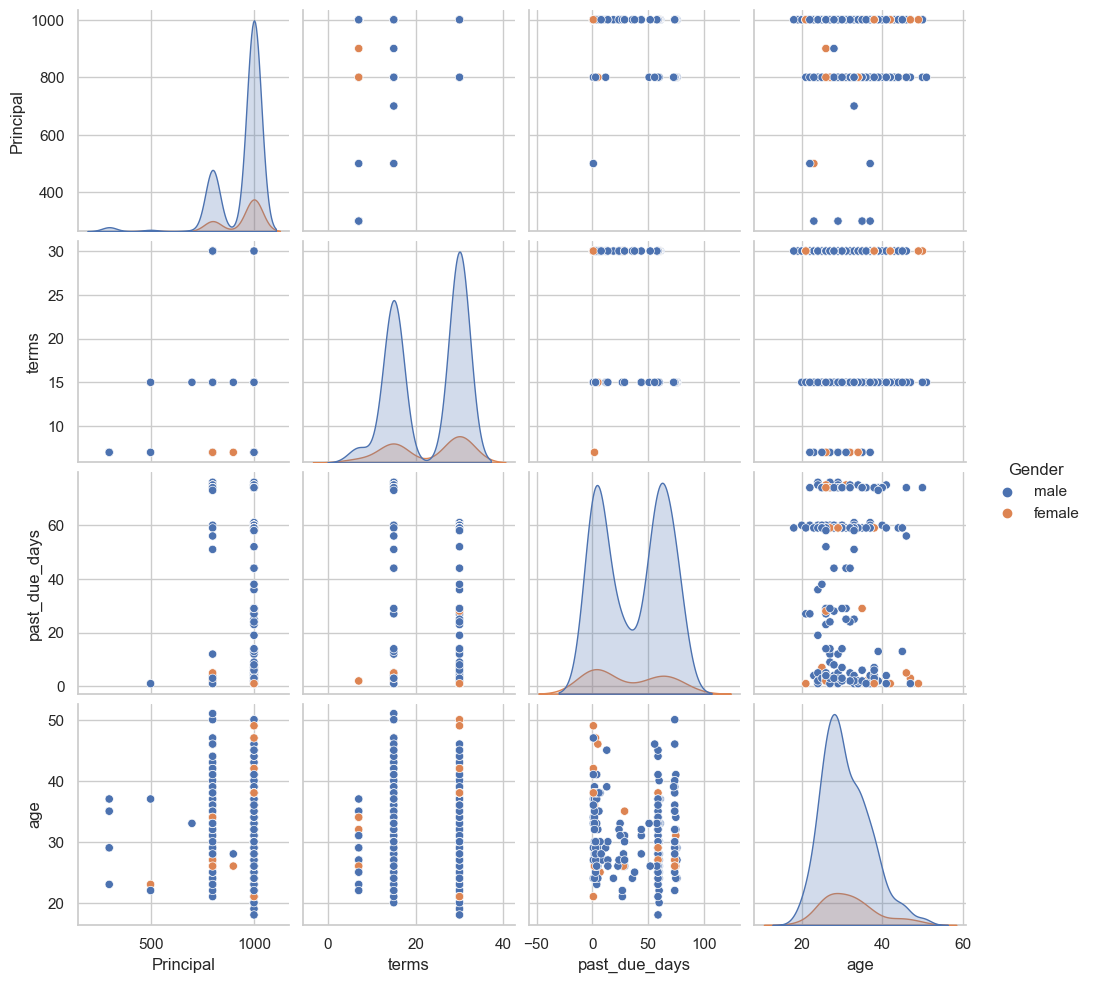

In [76]:
sns.pairplot(df_loan, hue='Gender')

**Comments:**
- From the visualization we can observe the variations in each plot.
- The plots are in matrix format where the row name represents x axis and column name represents the y axis.
- The main-diagonal subplots are the univariate (age vs age, principal vs principal, etc) histograms for each attribute.

**Violin Plots** 

Violin plots are a type of data visualization that can be used to display the distribution of a numerical variable for one or more categories. They are similar to box plots in that they display summary statistics such as the median, quartiles, and outliers, but they also show the shape of the distribution, which can be useful for identifying modes, skewness, and kurtosis which we discussed in Week 1.

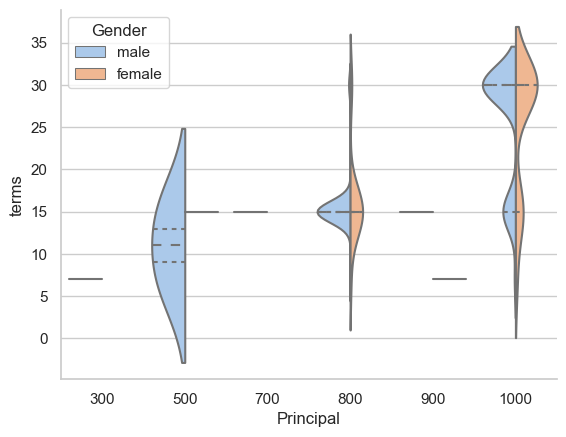

In [77]:
#Using violin plots to check the spread of the data

sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="Principal", y="terms", hue="Gender",
               split=True, inner="quart",
               
               data=df_loan)
sns.despine(left=False)

Here, the violin plot was used to explore the relationship between loan principal, loan terms, and gender. The use of a nested violin plot allows us to visualize the distribution of loan terms and loan principal amounts for each gender in a single plot. By splitting the violins, we can also compare the distribution of loan terms and loan principal amounts between genders more easily.

The inner quartiles inside the violins provide an additional layer of detail, showing the range of values where the middle 50% of the data falls. This can give us a sense of the variability of the data within each group. Overall, the violin plot can be a useful tool for exploring the distribution of loan principal, loan terms, and gender in the loan dataset.

With these, we solidify our understanding of our data, we now have a feel of how incomplete it is and how it is not useful in actual loan scenarios, but at least we have a dataset which we can create a data model with.

### Data Preprocessing and Modeling

In this part we will clean our data, and transform our non-numerical data to numerical with either binary encoding or ordinal encoding. We will define functions to the encoding and then pass our data later on to these functions. Later we will visualize our fully encoded data, ready for training and testing.

**Binary Encoder** <br/>
- What this function does is assign binary values (0 or 1) to our data (e.g. 1 - Male, 0 - Female).
- It takes 3 arguments or inputs:
1. df (data)
2. column (column of the data that we want to encode)
3. positive_value (which value do we want to take the positive assignment)

- It returns the encoded value of the data

It also uses the **Apply-Lambda technique** which is a function in Pandas that we use if we want to re-assign a new value to a data if it meets a certain criteria or condition.

In this case, it will change the value of a data to 1 if the data satisfies the argument that we provided for positive_value

In [78]:
#Defining the binary encoder function

def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df



**Ordinal Encoder** <br/>
- What this function does is assign a numerical or ordinal values (1, 2, 3, 4 ...) to our data (e.g. 1 - High School, 2 - Bachelors, etc).
- It takes 3 arguments or inputs:
1. df (Pandas dataframe data)
2. column (name of column from the data that we want to encode)
3. ordering (takes an array input of the unique values in order of how we want them to have the numbers assigned)

- It returns the encoded value of the data

It also uses the **Apply-Lambda technique** which was explained above.

In [79]:
# Defining the ordinal encoder

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

**Preprocessing**

This  preprocess_inputs function takes a Pandas DataFrame as an argument and preprocesses it for use in a machine learning model. The function performs the following steps:

Data Cleaning
1. It creates a copy of the input DataFrame to avoid modifying the original data.
2. Drops the Loan_ID column from the DataFrame because it is irrelevant to our model.
3. Converts the effective_date, due_date, and paid_off_time columns to a unified datetime format.
4. Extracts the day, month, and hour values from the effective_date, due_date, and paid_off_time columns and creates new columns for each.
5. Drops the effective_date, due_date, and paid_off_time columns from the DataFrame as we already got what we want from them in step 4.
6. Fills missing values in the past_due_days, paid_off_month, paid_off_day, and paid_off_hour columns with their respective column **means**.

Encoding
1. Encodes the Gender column with binary encoding, where 'male' is represented as 1 and 'female' is represented as 0. <br/>
2. Encodes the education column with ordinal encoding, based on the provided education_ordering. <br/>
3. Encodes the loan_status column with numerical labels, based on the provided label_mapping.

Data Splitting
1. Splits the preprocessed DataFrame into input features X and target variable y. 

Normalizing
1. Scales the input features using the StandardScaler method from Scikit-learn. 

Output
1. Finally, the function returns the preprocessed input features X and target variable y.

In [80]:
def preprocess_inputs(df):
    df = df.copy()
    
    ###################
    ## DATA CLEANING ##
    ###################

    # Drop Loan_ID column
    df = df.drop('Loan_ID', axis=1)
    
    # Create date/time columns
    for column in ['effective_date', 'due_date', 'paid_off_time']:
        df[column] = pd.to_datetime(df[column])
    
    df['effective_day'] = df['effective_date'].apply(lambda x: x.day)
    
    df['due_month'] = df['due_date'].apply(lambda x: x.month)
    df['due_day'] = df['due_date'].apply(lambda x: x.day)
    
    df['paid_off_month'] = df['paid_off_time'].apply(lambda x: x.month)
    df['paid_off_day'] = df['paid_off_time'].apply(lambda x: x.day)
    df['paid_off_hour'] = df['paid_off_time'].apply(lambda x: x.hour)
    
    df = df.drop(['effective_date', 'due_date', 'paid_off_time'], axis=1)
    
    # Fill missing values with column means
    for column in ['past_due_days', 'paid_off_month', 'paid_off_day', 'paid_off_hour']:
        df[column] = df[column].fillna(df[column].mean())

    ################
    ### ENCODING ###
    ################
    
    # Binary encode the Gender column
    df = binary_encode(df, 'Gender', positive_value='male')
    
    # Ordinal encode the education column
    education_ordering = [
        'High School or Below',
        'college',
        'Bechalor',
        'Master or Above'
    ]
    df = ordinal_encode(df, 'education', ordering=education_ordering)
    
    # Encode the label (loan_status) column
    label_mapping = {'COLLECTION': 0, 'PAIDOFF': 1, 'COLLECTION_PAIDOFF': 2}
    df['loan_status'] = df['loan_status'].replace(label_mapping)

    #################
    ### SPLITTING ###
    #################
    
    # Split df into X and y (input and target data)
    y = df['loan_status'].copy()
    X = df.drop('loan_status', axis=1).copy()

    #################
    ## NORMALIZING ##
    #################
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    ##############
    ### OUTPUT ###
    ##############

    return X, y

In [81]:
# Applying the preprocess function into our data

X, y = preprocess_inputs(df_loan)

In [82]:
#Recombining my inputs to targets to create a new dataframe with pre-processed values for heatmap correlation visualization
df_processed = X
df_processed['Target'] = y
corr_matrix = df_processed.corr()
corr_matrix

,Principal,terms,past_due_days,age,education,Gender,effective_day,due_month,due_day,paid_off_month,paid_off_day,paid_off_hour,Target
Principal,1.000000,0.534302,-0.044811,-0.092613,-0.104652,-0.008355,-0.008855,0.469578,-0.414332,0.347056,-0.220734,-0.033559,0.008240
terms,0.534302,1.000000,-0.060360,-0.074259,-0.123988,0.008630,0.009883,0.870243,-0.879720,0.634110,-0.572024,-0.032595,0.002770
past_due_days,-0.044811,-0.060360,1.000000,-0.034453,-0.041977,0.038037,-0.157875,-0.125931,0.062781,-0.073336,-0.050307,-0.037034,-0.916153
age,-0.092613,-0.074259,-0.034453,1.000000,0.039788,-0.053843,0.041087,-0.104231,0.120141,-0.091499,0.089298,-0.035168,0.037976
education,-0.104652,-0.123988,-0.041977,0.039788,1.000000,-0.020409,-0.051392,-0.091699,0.088392,-0.049176,0.040630,-0.090585,0.061861
Gender,-0.008355,0.008630,0.038037,-0.053843,-0.020409,1.000000,-0.022503,-0.010781,0.002572,0.001912,0.012871,0.010444,-0.035044
effective_day,-0.008855,0.009883,-0.157875,0.041087,-0.051392,-0.022503,1.000000,0.004806,0.166617,0.055037,0.015501,-0.163974,0.162343
due_month,0.469578,0.870243,-0.125931,-0.104231,-0.091699,-0.010781,0.004806,1.000000,-0.884795,0.733243,-0.583252,-0.024347,0.022253
due_day,-0.414332,-0.879720,0.062781,0.120141,0.088392,0.002572,0.166617,-0.884795,1.000000,-0.623564,0.669645,-0.017667,0.006838
paid_off_month,0.347056,0.634110,-0.073336,-0.091499,-0.049176,0.001912,0.055037,0.733243,-0.623564,1.000000,-0.737331,-0.018142,0.201852


<Axes: >

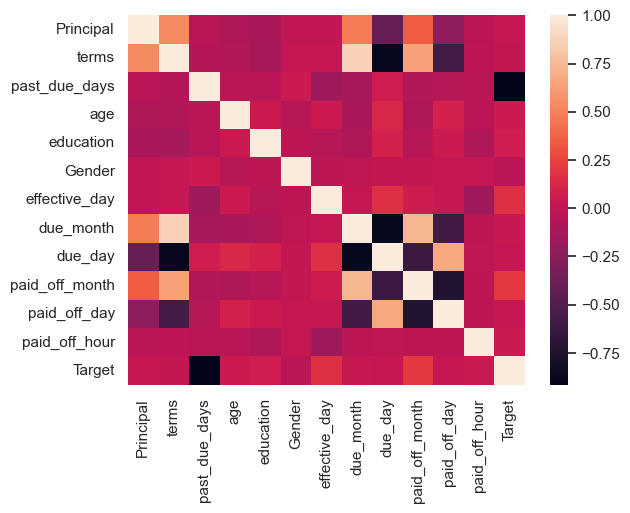

In [83]:
sns.heatmap(corr_matrix)

There is not much variables that has a high correlation to Target, but paid_off_month,due_month, and education looks to have a good correlation. For this activity, we will just use all of the features in predicting the outcome.

In [84]:
#Just double checking the number of unique targets:
print(df_processed['Target'].unique())

[1 0 2]


We confirm that we have 3 targets: <br/>
0 - 'COLLECTION' <br/>
1 - 'PAIDOFF' <br/>
2 - 'COLLECTION_PAIDOFF' <br/>

**COLLECTION** means the borrower has not been able to pay yet so predicted values with this output will have a higher chance that it will default, **PAIDOFF** means the borrower was able to pay their dues without the lender having to collect fees, so they should be a good candidate for lending money to. Lastly, **COLLECTION_PAIDOFF** are those who were able to pay off after collection efforts by the lender. They should still be a good candidate but the lender should proceed with caution and do extra background checking.  

**Multinomial Logistic Regression With Python**

Since we have 3 outputs, this becomes a Multinomial logistic regression which is a logistic regression that uses one vs rest method so that it could support multi-class classification problems. 

One-vs-Rest (OvR) is a multi-class classification method that involves training a binary classifier for each class, which can be used to distinguish between that class and the rest of the classes. In other words, in the OvR method, the multi-class problem is decomposed into a set of binary classification problems.

In this dataset, we have a loan dataset with three target classes: "**collection**", "**paid off**", and "**collection paid off**". To apply the OvR method, we would train three binary classifiers as follows:

Classifier 1: Classify instances as "collection" vs. "not collection" (i.e., "paid off" or "collection paid off"). <br/>
Classifier 2: Classify instances as "paid off" vs. "not paid off" (i.e., "collection" or "collection paid off"). <br/>
Classifier 3: Classify instances as "collection paid off" vs. "not collection paid off" (i.e., "collection" or "paid off"). <br/> <br/>
Once these classifiers are trained, we can use them to predict the class of a new instance by applying each of the classifiers to the instance and selecting the class with the highest probability.

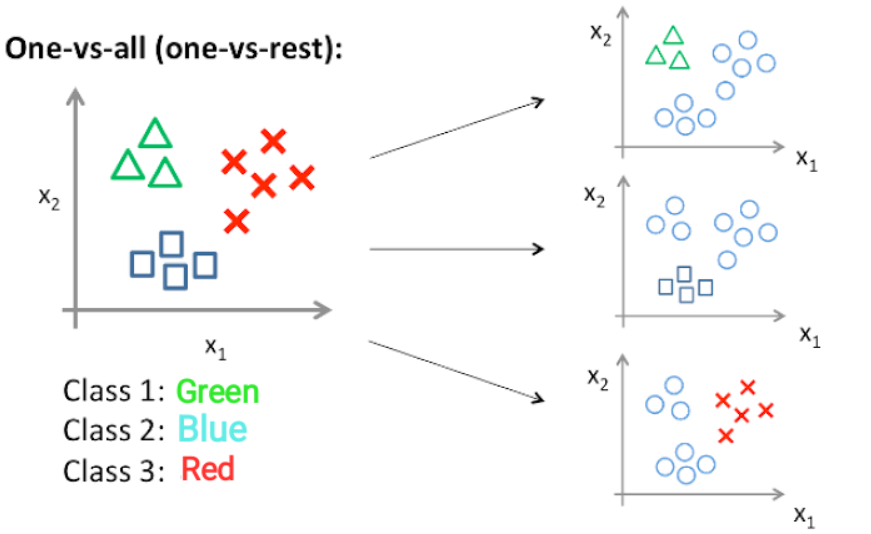

In the context of loan data, if we are using OvR with logistic regression, each classifier will learn the relationship between the loan features and the probability of the corresponding class (i.e., "collection", "paid off", or "collection paid off"). The output of the classifiers will be a probability score between 0 and 1, which can be interpreted as the confidence of the classifier in predicting the positive class (e.g., "collection"). The class with the highest probability will be chosen as the predicted class for the instance.

In [85]:
# Randomly splitting test and train datasets using sklearn's train_test_split function,
# We split it to 70% training data, 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

**Model Training**

Next, we fit a logistic regression model to the training data using scikit-learn's LogisticRegression function.

What each line does are:

1. 'models = LogisticRegression()': this creates a new instance of the LogisticRegression class, which represents a logistic regression model.
2. 'model.fit(X_train, y_train)': this fits the logistic regression model to the training data by calling the fit method of the LogisticRegression object. The X_train parameter is a matrix of input features, and y_train is a vector of our target vales.

The fit method computes the optimal model parameters based on the input data, which are used to predict the probability of the positive class for new examples.

Once the model is fitted, you can use it to predict the target values for new examples by calling the predict method with the input features as input. 

In [86]:
#Fitting the data to the logistic regression model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [87]:
y_pred = model.predict(X_test)

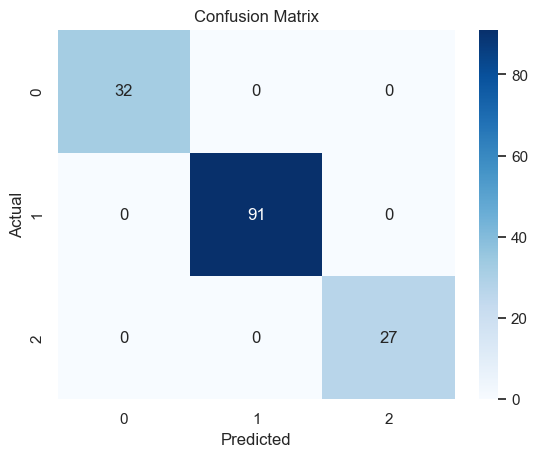

In [88]:
#Generating the confusion matrix and visualizing it as a heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

The confusion matrix summarizes the performance of the model.

- The top-left cell (30) represents the number of true negatives (TN) - i.e., the number of instances that were correctly predicted as negative (class 0).
- The middle cell in the first row (2) represents the number of false positives (FP) - i.e., the number of instances that were incorrectly predicted as positive (class 1) when they were actually negative (class 0).
- The bottom-left cell (0) represents the number of false positives (FP) - i.e., the number of instances that were incorrectly predicted as positive (class 1) when they were actually negative (class 0).
- The middle cell in the second row (91) represents the number of true positives (TP) - i.e., the number of instances that were correctly predicted as positive (class 1).
- The cells outside of the main diagonal (i.e., the off-diagonal cells) represent the misclassifications made by the model. In this case, there are no misclassifications between classes 0 and 2, or between classes 1 and 2.
- The bottom-right cell (27) represents the number of true positives (TP) - i.e., the number of instances that were correctly predicted as positive (class 2).

In [89]:
# Generate the classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        27

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



**Classification Report:**

Classification report provides a summary of various classification metrics for each class as well as an overall weighted average of the metrics. 

1. **precision**: he precision of the classifier is the ratio of true positives to the total number of positive predictions (i.e., true positives + false positives). A high precision score indicates that the model is accurately predicting positive instances. In this report, the precision scores for all classes are high, with values ranging from 0.98 to 1.00, which indicates that the model is doing well in correctly classifying the instances. <br/> <br/> 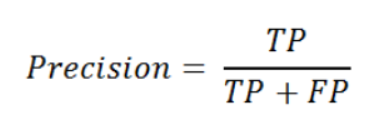



2. **recall**: The recall of the classifier is the ratio of true positives to the total number of actual positives (i.e., true positives + false negatives). A high recall score indicates that the model is able to correctly identify most of the positive instances. In this report, the recall scores for all classes are also high, ranging from 0.94 to 1.00, indicating that the model is doing well in identifying the positive instances. <br/> <br/>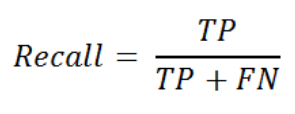

3. **f1-score**: The F1-score is the harmonic mean of the precision and recall, and provides an overall measure of the classifier's accuracy. A high F1-score indicates that the model is achieving both high precision and high recall. In this report, the F1-score for all classes are high, ranging from 0.97 to 1.00. 

4. **support**: The support metric indicates the number of instances in each class.

5. **accuracy**: The overall accuracy of the model, which is the ratio of correctly classified instances to the total number of instances. In this report, the accuracy score is high at 0.99, which means that the model is able to correctly classify almost all instances.

6. **macro avg**: The macro average of precision, recall, and f1-score is computed by taking the average of the metrics across all classes. It gives an equal weight to each class, regardless of its size. 

7. **weighted avg**: The weighted average of the precision, recall, and F1-score, which provides a measure of the overall performance of the model while taking into account class imbalance (i.e., instances of different classes have different frequencies).

**Conclusion**

Based on the classification report and the accuracy score, we can conclude that the logistic regression model performs well in classifying the loan data.

The model has an accuracy score of 0.99, which means that it correctly classified 99% of the loan instances in the test set. The precision, recall, and F1-score for each class are also high, indicating that the model is good at predicting each class.

It's important to note that the dataset used in this analysis may not be representative of the overall population, and as such, the results of the model should be interpreted with caution. Additionally, other metrics such as ROC AUC and cross-validation could be used to further evaluate the performance of the model.

**Recommendation**

Based on the results of the logistic regression model, here are some recommendations:

1. Further evaluate the model's performance using cross-validation and ROC AUC to ensure that it is robust and generalizable to other datasets.
2. Collect more data to ensure that the model is trained on a diverse range of instances and can handle a variety of loan scenarios.
3. Investigate the features that are most important in predicting loan repayment, and consider using this information to inform loan approval decisions.
4. Consider using an ensemble of multiple models to improve the accuracy and robustness of the loan classification process.
5. Finally, it's important to ensure that the model is used ethically and fairly, and that it does not introduce bias or discriminate against certain groups of people.